***
# Carga de Librerias
***

In [1]:
import pandas as pd
import numpy as np
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from warnings import filterwarnings
pd.options.display.max_columns = 500

In [2]:
import seaborn as sns
import missingno as msgo
import plotly_express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from shapely.geometry import Polygon
import geopandas


%matplotlib inline

import matplotlib.pyplot as plt

Lectura de zonas y coordenadas geograficas

In [3]:
df_zones = pd.read_csv("C:/Users/Laptop/Desktop/DS4/datathlon/Bogota_2_Journal/Datathon/Dataset/zones.csv")
df_geo = pd.read_csv("C:/Users/Laptop/Desktop/DS4/datathlon/Bogota_2_Journal/Datathon/Dataset/geographic.csv")

In [4]:
df_zones.head()

,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


### Convertir la tabla para obtener las latitudes y longitudes por zonas

In [5]:
df_geoOrder=pd.merge(df_geo[df_geo.reset_index().index%2==0].reset_index(drop=True),
        df_geo[df_geo.reset_index().index%2!=0].reset_index(drop=True),
         left_index=True, right_index=True,
        suffixes=('_lat', '_long'))

In [6]:
df_geoOrder

,BK88_lat,QN52_lat,QN48_lat,QN51_lat,QN27_lat,BX35_lat,BX98_lat,QN07_lat,MN06_lat,QN02_lat,QN46_lat,BK25_lat,BX59_lat,QN41_lat,MN17_lat,MN19_lat,QN47_lat,QN08_lat,QN54_lat,QN25_lat,QN55_lat,QN06_lat,BK44_lat,BK40_lat,BK41_lat,BK95_lat,BX33_lat,BK69_lat,BX52_lat,QN49_lat,QN26_lat,BK27_lat,BK28_lat,BK76_lat,QN30_lat,BK17_lat,QN35_lat,QN61_lat,SI45_lat,QN63_lat,QN76_lat,QN01_lat,BX10_lat,BK34_lat,QN33_lat,QN70_lat,QN34_lat,QN66_lat,BK45_lat,BK43_lat,BK26_lat,BK29_lat,SI12_lat,SI28_lat,BK19_lat,SI48_lat,BK85_lat,QN56_lat,BK60_lat,BK90_lat,BK72_lat,BK75_lat,BK81_lat,MN20_lat,BK35_lat,BK79_lat,BK61_lat,MN21_lat,BK63_lat,BK96_lat,BX07_lat,BX44_lat,BX03_lat,BX31_lat,BK93_lat,QN31_lat,QN62_lat,BK91_lat,SI07_lat,QN45_lat,BK78_lat,BK77_lat,QN20_lat,QN43_lat,QN44_lat,BX41_lat,BK46_lat,QN22_lat,SI22_lat,MN27_lat,MN50_lat,BX22_lat,BX29_lat,BK42_lat,BX62_lat,SI25_lat,BX30_lat,BX36_lat,BX34_lat,QN10_lat,QN12_lat,BX17_lat,BX37_lat,QN17_lat,QN60_lat,BK68_lat,BX01_lat,BX40_lat,MN34_lat,MN31_lat,QN68_lat,BX39_lat,QN72_lat,QN42_lat,QN23_lat,BX14_lat,BX49_lat,BX08_lat,BX46_lat,BX55_lat,BX05_lat,BX43_lat,BX27_lat,BX75_lat,SI08_lat,SI35_lat,BX13_lat,BK64_lat,BK30_lat,QN15_lat,QN50_lat,QN57_lat,QN28_lat,QN98_lat,QN53_lat,BK73_lat,MN04_lat,MN03_lat,SI24_lat,BK21_lat,BK23_lat,QN19_lat,MN01_lat,BX06_lat,MN11_lat,MN40_lat,MN14_lat,BX28_lat,MN09_lat,MN12_lat,MN22_lat,MN28_lat,MN35_lat,MN36_lat,BX26_lat,BX63_lat,BX09_lat,BX99_lat,QN99_lat,SI36_lat,QN03_lat,QN05_lat,SI01_lat,SI54_lat,BK50_lat,BK58_lat,BK33_lat,SI14_lat,SI37_lat,QN71_lat,BK32_lat,BK37_lat,QN37_lat,QN38_lat,QN21_lat,BK09_lat,BK38_lat,BK82_lat,BK83_lat,SI11_lat,SI05_lat,SI32_lat,BK31_lat,BK99_lat,SI99_lat,MN25_lat,MN24_lat,MN23_lat,MN13_lat,MN15_lat,MN32_lat,MN33_lat,MN99_lat,QN18_lat,QN29_lat,BK88_long,QN52_long,QN48_long,QN51_long,QN27_long,BX35_long,BX98_long,QN07_long,MN06_long,QN02_long,QN46_long,BK25_long,BX59_long,QN41_long,MN17_long,MN19_long,QN47_long,QN08_long,QN54_long,QN25_long,QN55_long,QN06_long,BK44_long,BK40_long,BK41_long,BK95_long,BX33_long,BK69_long,BX52_long,QN49_long,QN26_long,BK27_long,BK28_long,BK76_long,QN30_long,BK17_long,QN35_long,QN61_long,SI45_long,QN63_long,QN76_long,QN01_long,BX10_long,BK34_long,QN33_long,QN70_long,QN34_long,QN66_long,BK45_long,BK43_long,BK26_long,BK29_long,SI12_long,SI28_long,BK19_long,SI48_long,BK85_long,QN56_long,BK60_long,BK90_long,BK72_long,BK75_long,BK81_long,MN20_long,BK35_long,BK79_long,BK61_long,MN21_long,BK63_long,BK96_long,BX07_long,BX44_long,BX03_long,BX31_long,BK93_long,QN31_long,QN62_long,BK91_long,SI07_long,QN45_long,BK78_long,BK77_long,QN20_long,QN43_long,QN44_long,BX41_long,BK46_long,QN22_long,SI22_long,MN27_long,MN50_long,BX22_long,BX29_long,BK42_long,BX62_long,SI25_long,BX30_long,BX36_long,BX34_long,QN10_long,QN12_long,BX17_long,BX37_long,QN17_long,QN60_long,BK68_long,BX01_long,BX40_long,MN34_long,MN31_long,QN68_long,BX39_long,QN72_long,QN42_long,QN23_long,BX14_long,BX49_long,BX08_long,BX46_long,BX55_long,BX05_long,BX43_long,BX27_long,BX75_long,SI08_long,SI35_long,BX13_long,BK64_long,BK30_long,QN15_long,QN50_long,QN57_long,QN28_long,QN98_long,QN53_long,BK73_long,MN04_long,MN03_long,SI24_long,BK21_long,BK23_long,QN19_long,MN01_long,BX06_long,MN11_long,MN40_long,MN14_long,BX28_long,MN09_long,MN12_long,MN22_long,MN28_long,MN35_long,MN36_long,BX26_long,BX63_long,BX09_long,BX99_long,QN99_long,SI36_long,QN03_long,QN05_long,SI01_long,SI54_long,BK50_long,BK58_long,BK33_long,SI14_long,SI37_long,QN71_long,BK32_long,BK37_long,QN37_long,QN38_long,QN21_long,BK09_long,BK38_long,BK82_long,BK83_long,SI11_long,SI05_long,SI32_long,BK31_long,BK99_long,SI99_long,MN25_long,MN24_long,MN23_long,MN13_long,MN15_long,MN32_long,MN33_long,MN99_long,QN18_long,QN29_long
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,-73.767796,-73.958594,-73.839369,-73.777576,-73.973016,-73.961631,-73.767796,-73.752052,-73.816380,-73.857349,-73.805770,-73.756705,-73.937539,-73.980173,-73.970843,-73.948266,-73.89

#### Convertir los puntos de latitudes y longitudes en poligonos, Así mismo creación de datafrae de zona con geometria para unir con df_zone

In [7]:

df = pd.DataFrame({'Zone':df_geo.columns.unique() })
for nat_code in df["Zone"].unique():
    coordinates=[x for x in df_geoOrder.columns.unique() if nat_code in x]
    print(coordinates)
    df_geoOrder[coordinates].dropna().head()
    poly = Polygon(list(zip(df_geoOrder[coordinates[0]].dropna(),df_geoOrder[coordinates[1]].dropna())))
    #df["geometry"]=poly.wkt
    df.loc[df["Zone"] ==nat_code,"geometry"]=poly.wkt

['BK88_lat', 'BK88_long']
['QN52_lat', 'QN52_long']
['QN48_lat', 'QN48_long']
['QN51_lat', 'QN51_long']
['QN27_lat', 'QN27_long']
['BX35_lat', 'BX35_long']
['BX98_lat', 'BX98_long']
['QN07_lat', 'QN07_long']
['MN06_lat', 'MN06_long']
['QN02_lat', 'QN02_long']
['QN46_lat', 'QN46_long']
['BK25_lat', 'BK25_long']
['BX59_lat', 'BX59_long']
['QN41_lat', 'QN41_long']
['MN17_lat', 'MN17_long']
['MN19_lat', 'MN19_long']
['QN47_lat', 'QN47_long']
['QN08_lat', 'QN08_long']
['QN54_lat', 'QN54_long']
['QN25_lat', 'QN25_long']
['QN55_lat', 'QN55_long']
['QN06_lat', 'QN06_long']
['BK44_lat', 'BK44_long']
['BK40_lat', 'BK40_long']
['BK41_lat', 'BK41_long']
['BK95_lat', 'BK95_long']
['BX33_lat', 'BX33_long']
['BK69_lat', 'BK69_long']
['BX52_lat', 'BX52_long']
['QN49_lat', 'QN49_long']
['QN26_lat', 'QN26_long']
['BK27_lat', 'BK27_long']
['BK28_lat', 'BK28_long']
['BK76_lat', 'BK76_long']
['QN30_lat', 'QN30_long']
['BK17_lat', 'BK17_long']
['QN35_lat', 'QN35_long']
['QN61_lat', 'QN61_long']
['SI45_lat',

##### Merge de dataframes

In [8]:
df_coordinates=pd.merge(df_zones,
         df,
         left_on="nta_code",
         right_on="Zone",
         how="left")

In [9]:
df_coordinates

,location_id,borough,zone,service_zone,nta_code,Zone,geometry
0,1,EWR,Newark Airport,EWR,NJ01,NaN,NaN
1,2,Queens,Jamaica Bay,Boro Zone,QN61,QN61,"POLYGON ((-73.7684468367285 40.7096452912339, ..."
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31,BX31,"POLYGON ((-73.853637796689 40.8733088923496, -..."
3,4,Manhattan,Alphabet City,Yellow Zone,MN22,MN22,"POLYGON ((-73.9825577344437 40.7313583954125, ..."
4,5,Staten Island,Arden Heights,Boro Zone,SI48,SI48,"POLYGON ((-74.17185315696909 40.5615291439051,..."
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone,SI14,SI14,"POLYGON ((-74.0815561668179 40.6062985299242, ..."
6,7,Queens,Astoria,Boro Zone,QN70,QN70,POLYGON ((-73.90202658350691 40.76742505458871...
7,8,Queens,Astoria Park,Boro Zone,QN70,QN70,POLYGON ((-73.90202658350691 40.76742505458871...
8,9,Queens,Auburndale,Boro Zone,QN48,QN48,"POLYGON ((-73.7757397458527 40.7433339175923, ..."
9,10,Queens,Baisley Park,Boro Zone,QN76,QN76,"POLYGON ((-73.774698673636 40.6804943050474, -..."


In [10]:
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(df_coordinates, crs=crs)

In [11]:
df_coordinates[pd.isna(df_coordinates.Zone)]

,location_id,borough,zone,service_zone,nta_code,Zone,geometry
0,1,EWR,Newark Airport,EWR,NJ01,NaN,NaN


In [12]:

import geopandas as gpd

In [13]:
#df_zones = pd.read_csv("../Dataset/query.txt")
df = gpd.read_file("C:/Users/Laptop/Desktop/pruebas/Bogota_2_Journal/Datathon/Dataset/nta_geojson.txt")

In [14]:
# se agrega subway
df_train = pd.read_csv("C:/Users/Laptop/Desktop/DS4/datathlon/Bogota_2_Journal/Datathon/Dataset/mta_trips.csv")
df_train.head()

C:\Users\Laptop\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



,station,line_name,division,audit_type,unit_id,datetime,new_entries,new_exits,latitude,longitude
0,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 05:00:00,4,6,40.703087,-74.012994
1,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 09:00:00,1,13,40.703087,-74.012994
2,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 13:00:00,1,8,40.703087,-74.012994
3,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 17:00:00,1,8,40.703087,-74.012994
4,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 21:00:00,2,3,40.703087,-74.012994


In [15]:
# personas agrupadas por estaciones
df_train_person = df_train.groupby(['station', 'longitude', 'latitude']).count()['new_entries'].reset_index()
df_train_person

,station,longitude,latitude,new_entries
0,1 AVE,-73.981628,40.730953,20183
1,103 ST,-73.961454,40.796092,31044
2,104 ST,-73.844330,40.695178,7682
3,110 ST,-73.944250,40.795020,12865
4,110 ST-CATHEDRL,-73.958158,40.800605,14423
5,110 ST-CPN,-73.958158,40.800605,13009
6,111 ST,-73.836345,40.697418,19603
7,116 ST,-73.954882,40.805085,47075
8,116 ST-COLUMBIA,-73.964110,40.807722,12281
9,121 ST,-73.828294,40.700492,10957


In [16]:
from shapely.geometry import Point

df_train_person['geometry'] = df_train_person.apply(lambda x: Point((x.longitude, x.latitude)),axis = 1)
df_train_person.head()


,station,longitude,latitude,new_entries,geometry
0,1 AVE,-73.981628,40.730953,20183,POINT (-73.981628 40.730953)
1,103 ST,-73.961454,40.796092,31044,POINT (-73.961454 40.796092)
2,104 ST,-73.844330,40.695178,7682,POINT (-73.84433 40.69517800000001)
3,110 ST,-73.944250,40.795020,12865,POINT (-73.94425 40.79502)
4,110 ST-CATHEDRL,-73.958158,40.800605,14423,POINT (-73.958158 40.800605)


In [17]:
import geopandas as gpd
prueba = gpd.GeoDataFrame(df_train_person, geometry = df_train_person.geometry)
prueba.head()

,station,longitude,latitude,new_entries,geometry
0,1 AVE,-73.981628,40.730953,20183,POINT (-73.98163 40.73095)
1,103 ST,-73.961454,40.796092,31044,POINT (-73.96145 40.79609)
2,104 ST,-73.844330,40.695178,7682,POINT (-73.84433 40.69518)
3,110 ST,-73.944250,40.795020,12865,POINT (-73.94425 40.79502)
4,110 ST-CATHEDRL,-73.958158,40.800605,14423,POINT (-73.95816 40.80060)


In [18]:
from shapely.geometry import Point

def getNtaMatch(var_longitude, var_latitude):
    for y in range(len(df.geometry.unique())):
        if Point((var_longitude, var_latitude)).within(df.geometry[y]):
            print(df.BoroName[y] )
            return df.NTACode[y]
    return "vacio"


In [19]:
 range(len(df.geometry.unique()))

range(0, 195)

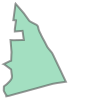

In [20]:
df.geometry[120]

In [21]:
df_train_person['nta_code'] =  df_train_person.apply( lambda x: getNtaMatch(x.longitude, x.latitude),axis = 1)


Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Bronx
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Bronx
Brooklyn
Manhattan
Manhattan
Bronx
Manhattan
Bronx
Manhattan
Queens
Bronx
Bronx
Bronx
Manhattan
Bronx
Brooklyn
Manhattan
Manhattan
Bronx
Bronx
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Bronx
Brooklyn
Bronx
Manhattan
Queens
Manhattan
Bronx
Bronx
Bronx
Bronx
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Brooklyn
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Queens
Queens
Manhattan
Queens
Manhattan
Queens
Brooklyn
Manhattan
Queens
Queens
Brooklyn
Brooklyn
Brooklyn
Manhattan
Queens
Brooklyn
Brooklyn
Brooklyn
Queens
Manhattan
Brooklyn
Bronx
Queens
Queens
Manhattan
Brooklyn
Brooklyn
Brooklyn
B

In [22]:
df_train_person[df_train_person.nta_code != "vacio"]

,station,longitude,latitude,new_entries,geometry,nta_code
0,1 AVE,-73.981628,40.730953,20183,POINT (-73.98163 40.73095),MN22
1,103 ST,-73.961454,40.796092,31044,POINT (-73.96145 40.79609),MN99
2,104 ST,-73.844330,40.695178,7682,POINT (-73.84433 40.69518),QN54
3,110 ST,-73.944250,40.795020,12865,POINT (-73.94425 40.79502),MN33
4,110 ST-CATHEDRL,-73.958158,40.800605,14423,POINT (-73.95816 40.80060),MN11
5,110 ST-CPN,-73.958158,40.800605,13009,POINT (-73.95816 40.80060),MN11
6,111 ST,-73.836345,40.697418,19603,POINT (-73.83634 40.69742),QN54
7,116 ST,-73.954882,40.805085,47075,POINT (-73.95488 40.80508),MN11
8,116 ST-COLUMBIA,-73.964110,40.807722,12281,POINT (-73.96411 40.80772),MN09
9,121 ST,-73.828294,40.700492,10957,POINT (-73.82829 40.70049),QN54


In [24]:
df_yellow = pd.read_csv("C:/Users/Laptop/Desktop/DS4/datathlon/Bogota_2_Journal/Datathon/Dataset/yellow_trips_new.csv")

In [26]:
df_yellow.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5


In [ ]:
df_yellow['nta_code']= df_yellow.apply( lambda x: getNtaMatch(x.pickup_longitude, x.pickup_latitude),axis = 1)

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhatta

Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Ma

Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan


Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
M

Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhat

Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manha

Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Ma

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhat

Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manha

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhat

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
M

Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Man

Queens
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatta

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Ma

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhat

Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manha

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manha

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Man

Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brook

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatta

Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Man

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhat

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhat

Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhat

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhat

Queens
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatta

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhat

Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Bronx
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
M

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Man

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Ma

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatta

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
M

Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brookl

Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Ma

Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Ma

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Man

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
B

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manha

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Man

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manha

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manha

Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Man

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manh

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manh

Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Bronx
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manh

Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan


Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhat

Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manha

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Queens
Manhattan
M

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Queens
Manhatt

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Ma

Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens


Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
M

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manh

Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Queens
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt